In [6]:
import os, inspect, sys
import numpy as np
import pandas as pd
curr_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe()))) # script directory
main_dir = '/'.join(curr_dir.split('/')[:-1])
python_dir = os.path.join(main_dir, 'RGCPD')
df_ana_dir = os.path.join(main_dir, 'df_analysis/df_analysis/')
if main_dir not in sys.path:
    sys.path.append(main_dir)
    sys.path.append(python_dir)
    sys.path.append(df_ana_dir)

In [7]:
%load_ext autoreload
%autoreload 2

import func_fc
import df_ana


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# adapt df_art to forecasting format with TrainIsTrue and RV_mask column

In [5]:
from func_fc import fcev
path_data = '/Users/semvijverberg/surfdrive/Scripts/RGCPD/df_analysis/df_data.h5'
df_data = df_ana.load_hdf5(path_data)['df_data']

fc = fcev(path_data, name='y')

fc.get_TV(kwrgs_events=None)

logit = ('logit', None)
keys_d = {s:np.array(['y_x', 'x']) for s in range(10)}

kwrgs_pp ={'EOF':False, 
            'expl_var':0.5,
            'remove_RV' : True}
fc.fit_models(stat_model_l=[logit], lead_max=100, 
                   keys_d=keys_d, causal=False, kwrgs_pp=kwrgs_pp)
y_pred_all, y_pred_c = fc.dict_models['logit']


tfreq: 1, max lag: 100, i.e. 100 days
Progress 100%

('logit', None) 


ROC area	: 0.912
P-R area	: 0.848
BSS     	: 0.500
Precision       : 0.704
Accuracy        : 0.824
0 logit


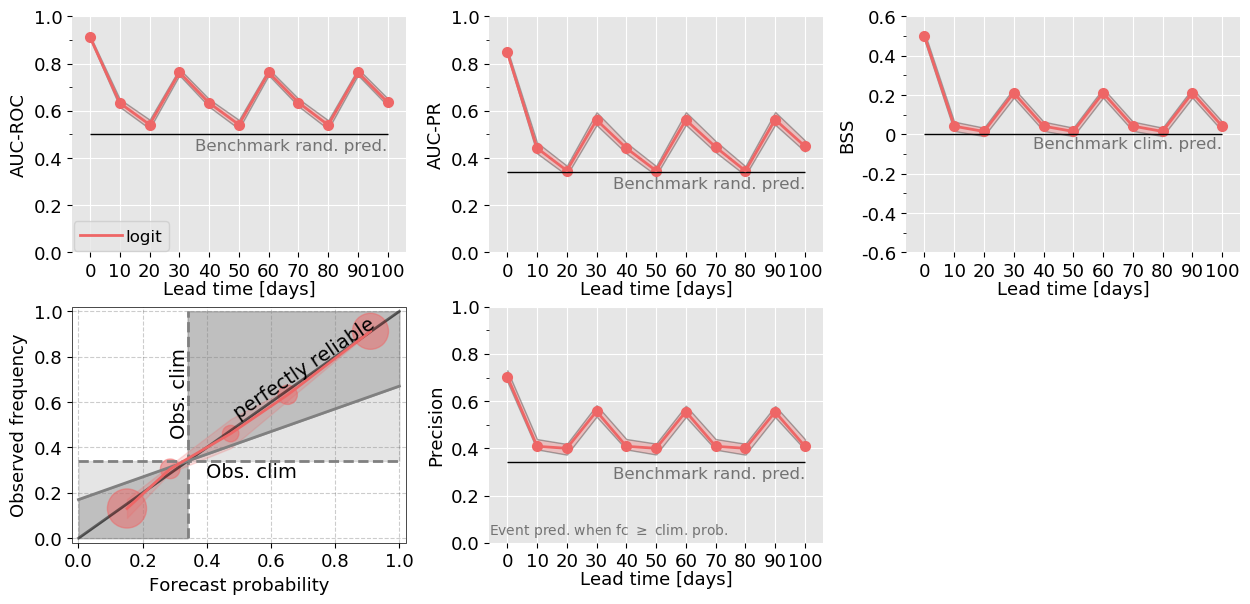

In [6]:
dict_experiments = {}       
fc.perform_validation(n_boot=100, blocksize='auto', 
                              threshold_pred='clim')
dict_experiments['test'] = fc.dict_sum

import valid_plots as dfplots
kwrgs = {'wspace':0.25, 'col_wrap':3, 'threshold_bin':fc.threshold_pred}
met = ['AUC-ROC', 'AUC-PR', 'BSS', 'Rel. Curve', 'Precision']
expers = list(dict_experiments.keys())
models   = list(dict_experiments[expers[0]].keys())
line_dim = 'model'


fig = dfplots.valid_figures(dict_experiments, expers=expers, models=models,
                          line_dim=line_dim, 
                          group_line_by=None,  
                          met=met, **kwrgs)

In [7]:
fc.plot_scatter()

AttributeError: module 'df_analysis' has no attribute 'loop_df'